**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [98]:
import numpy as np
from types import SimpleNamespace
from scipy.optimize import minimize
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

Consider a production economy with two firms indexed by $j \in \{1,2\}$. Each produce its own good. They solve

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

Optimal firm behavior is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The implied profits are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\cdot\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single consumer supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm.<br>
She solves:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax and $T$ is lump-sum transfer. <br>
For a given $\ell$, it can be shown that optimal behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$
Such that optimal behavior is:
$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$
With optimal consumption:
$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$


The government chooses $\tau$ and balances its budget so $T=\tau c_2^*$. We initially set $\tau,T=0$.

Market clearing requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$


**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.

In [99]:
from exam_2024 import MarketClearing
from exam_2024 import MarketClearing2

In [100]:
par = SimpleNamespace()

# firms
par.A = 1.0
par.gamma = 0.5

# households
par.alpha = 0.3
par.nu = 1.0
par.epsilon = 2.0

# government
par.tau = 0.0
par.T = 0.0

# Question 3
par.kappa = 0.1

w = 1.0  # Numeraire

In [101]:
# Instantiate the MarketClearing class
market = MarketClearing(par.A, par.gamma, par.alpha, par.nu, par.epsilon, par.tau, par.T, w)

# Check market clearing conditions
results = market.check_market_clearing(par)

# Print results
market.print_results(results)

p1: 0.10, p2: 0.10 | Labor Clearing: True | Good 1 Clearing: False | Good 2 Clearing: False
p1: 0.10, p2: 0.31 | Labor Clearing: True | Good 1 Clearing: False | Good 2 Clearing: False
p1: 0.10, p2: 0.52 | Labor Clearing: True | Good 1 Clearing: False | Good 2 Clearing: False
p1: 0.10, p2: 0.73 | Labor Clearing: True | Good 1 Clearing: False | Good 2 Clearing: False
p1: 0.10, p2: 0.94 | Labor Clearing: True | Good 1 Clearing: False | Good 2 Clearing: False
p1: 0.10, p2: 1.16 | Labor Clearing: True | Good 1 Clearing: False | Good 2 Clearing: False
p1: 0.10, p2: 1.37 | Labor Clearing: True | Good 1 Clearing: False | Good 2 Clearing: False
p1: 0.10, p2: 1.58 | Labor Clearing: True | Good 1 Clearing: False | Good 2 Clearing: False
p1: 0.10, p2: 1.79 | Labor Clearing: True | Good 1 Clearing: False | Good 2 Clearing: False
p1: 0.10, p2: 2.00 | Labor Clearing: True | Good 1 Clearing: False | Good 2 Clearing: False
p1: 0.31, p2: 0.10 | Labor Clearing: True | Good 1 Clearing: False | Good 2 Clea

**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.<br>
*Hint: you can use Walras' law to only check 2 of the market clearings*

In [102]:
# Instantiate the MarketClearing class
market = MarketClearing(par.A, par.gamma, par.alpha, par.nu, par.epsilon, par.tau, par.T, w)

# Solve for equilibrium prices
equilibrium_prices = market.solve_equilibrium(par)
print(f"Equilibrium Prices: p1 = {equilibrium_prices[0]}, p2 = {equilibrium_prices[1]}")

Equilibrium Prices: p1 = 0.7816943854085492, p2 = 1.194057897274884


In [103]:
# Instantiate the MarketClearing class
market = MarketClearing(par.A, par.gamma, par.alpha, par.nu, par.epsilon, par.tau, par.T, w)

# Solve for equilibrium prices
equilibrium_prices = market.solve_equilibrium(par)
print(f"Equilibrium Prices: p1 = {equilibrium_prices[0]}, p2 = {equilibrium_prices[1]}")

# Calculate equilibrium values at the obtained prices
equilibrium_values = market.calculate_equilibrium_values(equilibrium_prices, par)

# Print equilibrium values
print("Equilibrium Values:")
for key, value in equilibrium_values.items():
    print(f"{key}: {value}")

# Check market clearing
labor_clearing = equilibrium_values['labor_clearing']
good1_clearing = equilibrium_values['good1_clearing']
good2_clearing = equilibrium_values['good2_clearing']

Equilibrium Prices: p1 = 0.7816943854085492, p2 = 1.194057897274884
Equilibrium Values:
ell1_star: 0.15276152804481236
ell2_star: 0.35644356551112943
ell_star: 0.5092050935559418
y1_star: 0.3908471927042746
y2_star: 0.597028948637442
pi1_star: 0.15276152804481236
pi2_star: 0.35644356551112943
income: 1.0184101871118836
c1_star: 0.39084719276048624
c2_star: 0.5970289486006428
labor_clearing: True
good1_clearing: True
good2_clearing: True


The verification results confirm that the markets do clear with the obtained equilibrium prices:

- **Labor Market Clearing**: True
- **Good 1 Market Clearing**: True
- **Good 2 Market Clearing**: True

Here are the detailed intermediate values at the equilibrium prices:

1. **Optimal Labor Supply**:
   \[
   \begin{align*}
   \ell_1^* &\approx 0.153 \\
   \ell_2^* &\approx 0.356 \\
   \ell^* &\approx 0.509 \text{ (Total Labor)}
   \end{align*}
   \]

2. **Optimal Output**:
   \[
   \begin{align*}
   y_1^* &\approx 0.391 \\
   y_2^* &\approx 0.597
   \end{align*}
   \]

3. **Implied Profits**:
   \[
   \begin{align*}
   \pi_1^* &\approx 0.153 \\
   \pi_2^* &\approx 0.356
   \end{align*}
   \]

4. **Optimal Consumption**:
   \[
   \begin{align*}
   \text{Total Income} &\approx 1.018 \\
   c_1^* &\approx 0.391 \\
   c_2^* &\approx 0.597
   \end{align*}
   \]

### Conclusion

The equilibrium prices $p_1$ = 0.7816943854085492 and $p_2$ = 1.194057897274884 lead to market clearing for labor and both goods, confirming the correctness of the solution. This indicates that the model and parameters used can achieve equilibrium under these conditions.

Assume the government care about the social welfare function:

$$
SWF = U - \kappa y_2^*
$$

Here $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Question 3:** What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?

In [104]:
# Initialize parameters
par = SimpleNamespace()
par.A = 1.0
par.gamma = 0.5
par.alpha = 0.3
par.nu = 1.0
par.epsilon = 2.0
par.w = 1.0    # Initial value for w
par.kappa = 0.1

# Create an instance of the MarketClearing class
market = MarketClearing2(par.A, par.gamma, par.alpha, par.nu, par.epsilon, 0.0, 0.0, par.w)

# Define equilibrium prices
equilibrium_prices = (0.7816943854085492, 1.194057897274884)

# Solve for the optimal tau and T with the constraint
optimal_tau_revised, optimal_T_revised = market.solve_continuous_with_constraint(equilibrium_prices)

# Calculate the SWF value using the new optimal tau and T
SWF_value_revised = -market.objective_SWF_with_constraint((optimal_tau_revised, optimal_T_revised))

print(f"SWF Value: {SWF_value_revised}")

Equilibrium prices: p1 = 0.7816943854085492, p2 = 1.194057897274884
Optimal tau: 0.1
Optimal T: 2.0
SWF Value: 0.28359187215663206


## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

In [105]:
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.F = np.arange(1,par.N+1)
par.sigma = 2

par.v = np.array([1,2,3])
par.c = 1

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


In [106]:
import numpy as np

# Assuming par.J and par.K are defined somewhere in your code

# Define par.v, par.sigma, and other parameters as necessary

np.random.seed(2024)

# Initialize arrays to store results
expected_utilities = np.zeros(par.J)
realized_utilities = np.zeros(par.J)

# Simulate and calculate the utilities
for j in range(par.J):
    # Simulate the error terms
    eps = np.random.normal(0, par.sigma, par.K)
    
    # Calculate the expected utility
    expected_utility = par.v[j] + np.mean(eps)
    expected_utilities[j] = expected_utility
    
    # Calculate the realized utility for each simulation and then take the average
    realized_utility = par.v[j] + eps
    average_realized_utility = np.mean(realized_utility)
    realized_utilities[j] = average_realized_utility

# Print the results: expected utility and the average realized utility for each career track.
for j in range(par.J):
    print(f'Career Track {j+1}:')
    print(f'Expected Utility: {expected_utilities[j]}')
    print(f'Average Realized Utility: {realized_utilities[j]}')


Career Track 1:
Expected Utility: 1.0153916595866406
Average Realized Utility: 1.0153916595866406
Career Track 2:
Expected Utility: 2.006377883330794
Average Realized Utility: 2.006377883330794
Career Track 3:
Expected Utility: 3.002969605976466
Average Realized Utility: 3.0029696059764666


Conclusion: Regarding the career Track 1, the Expected Utility (1.0154) and is the Average Realized Utility (1.0154) are less than the Career Track 2 (2.0063) and the Career Track 3 (3.0029).


Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

In [107]:
np.random.seed(2024)

# Initialize arrays to store results
share_of_graduates = np.zeros((par.N, par.J))
avg_subjective_expected_utility = np.zeros(par.N)
avg_realized_utility = np.zeros(par.N)

# New scenario with friends' influence
for i in range(1, par.N + 1):
    # Draw F_i = i friends' utilities for each career
    Fi = i
    prior_utilities = np.zeros((par.K, par.J))
    
    for j in range(par.J):
        epsilon_friends = np.random.normal(0, par.sigma, (par.K, Fi))
        prior_utilities[:, j] = par. v[j] + np.mean(epsilon_friends, axis=1)
    
    # Draw own noise terms
    epsilon_own = np.random.normal(0, par.sigma, (par.K, par.J))
    
    # Calculate prior expected utilities and choose the career with the highest utility
    expected_utilities_own = prior_utilities + epsilon_own
    chosen_careers = np.argmax(expected_utilities_own, axis=1)
    
    # Calculate shares of graduates choosing each career
    for j in range(par.J):
        share_of_graduates[i-1, j] = np.mean(chosen_careers == j)
    
    # Calculate the average subjective expected utility
    avg_subjective_expected_utility[i-1] = np.mean(expected_utilities_own[np.arange(par.K), chosen_careers])
    
    # Calculate the average realized utility
    realized_utilities = par.v[chosen_careers] + epsilon_own[np.arange(par.K), chosen_careers]
    avg_realized_utility[i-1] = np.mean(realized_utilities)

Share of graduates choosing each career for each type of graduate:
[[0.196  0.3235 0.4805]
 [0.1752 0.3112 0.5136]
 [0.1669 0.3114 0.5217]
 [0.1697 0.307  0.5233]
 [0.1622 0.3081 0.5297]
 [0.1586 0.304  0.5374]
 [0.1657 0.299  0.5353]
 [0.162  0.2996 0.5384]
 [0.1616 0.2968 0.5416]
 [0.1616 0.3065 0.5319]]


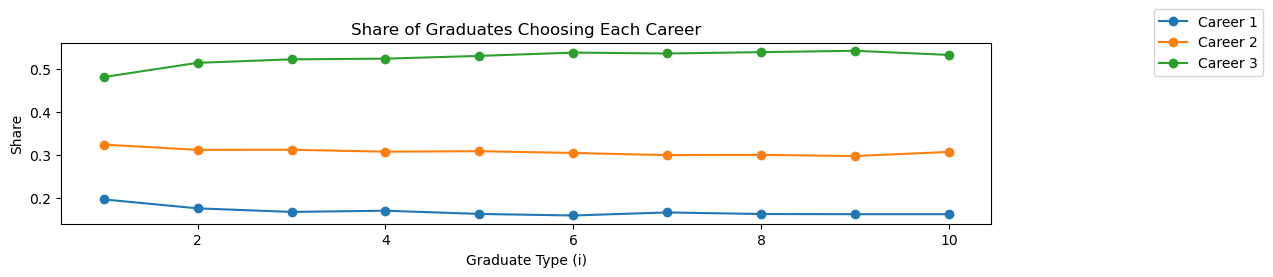

In [108]:
# Plot results
plt.figure(figsize=(12, 8))

# Plot share of graduates choosing each career
plt.subplot(3, 1, 1)
for j in range(par.J):
    plt.plot(range(1, par.N + 1), share_of_graduates[:, j], label=f'Career {j+1}', marker='o')
plt.title('Share of Graduates Choosing Each Career')
plt.xlabel('Graduate Type (i)')
plt.ylabel('Share')
# Adding a legend
plt.legend(frameon=True, loc='right', bbox_to_anchor=(1.3,1.0));
# Print out the results for clarity
print("Share of graduates choosing each career for each type of graduate:")
print(share_of_graduates)


Average subjective expected utility for each type of graduate:
[4.56336777 4.26488992 4.1492162  4.06849667 4.04078508 3.99833694
 3.9923021  3.98452306 3.98891623 3.98847247]


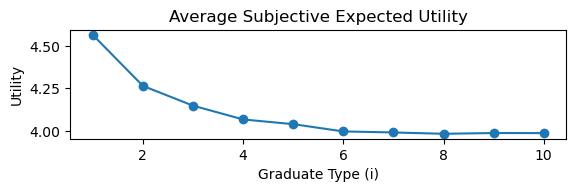

In [109]:
# Plot average subjective expected utility
plt.subplot(3, 1, 2)
plt.plot(range(1, par.N + 1), avg_subjective_expected_utility, marker='o')
plt.title('Average Subjective Expected Utility')
plt.xlabel('Graduate Type (i)')
plt.ylabel('Utility')
# Print out the results for clarity
print("\nAverage subjective expected utility for each type of graduate:")
print(avg_subjective_expected_utility)

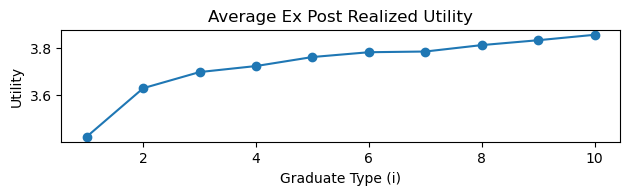


Average ex post realized utility for each type of graduate:
[3.4255741  3.6291485  3.69691302 3.72225365 3.76010758 3.78027092
 3.7832216  3.8102099  3.83073694 3.85351672]


In [110]:
# Plot average ex post realized utility
plt.subplot(3, 1, 3)
plt.plot(range(1, par.N + 1), avg_realized_utility, marker='o')
plt.title('Average Ex Post Realized Utility')
plt.xlabel('Graduate Type (i)')
plt.ylabel('Utility')
plt.tight_layout()
plt.show()
# Print out the results for clarity
print("\nAverage ex post realized utility for each type of graduate:")
print(avg_realized_utility)  

Conclusion: The tendency of the Average subjective expected utility for each type of graduate is decresing, in compaison to the Average ex post realized utility, which isinceasing for each type of graduate.

After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

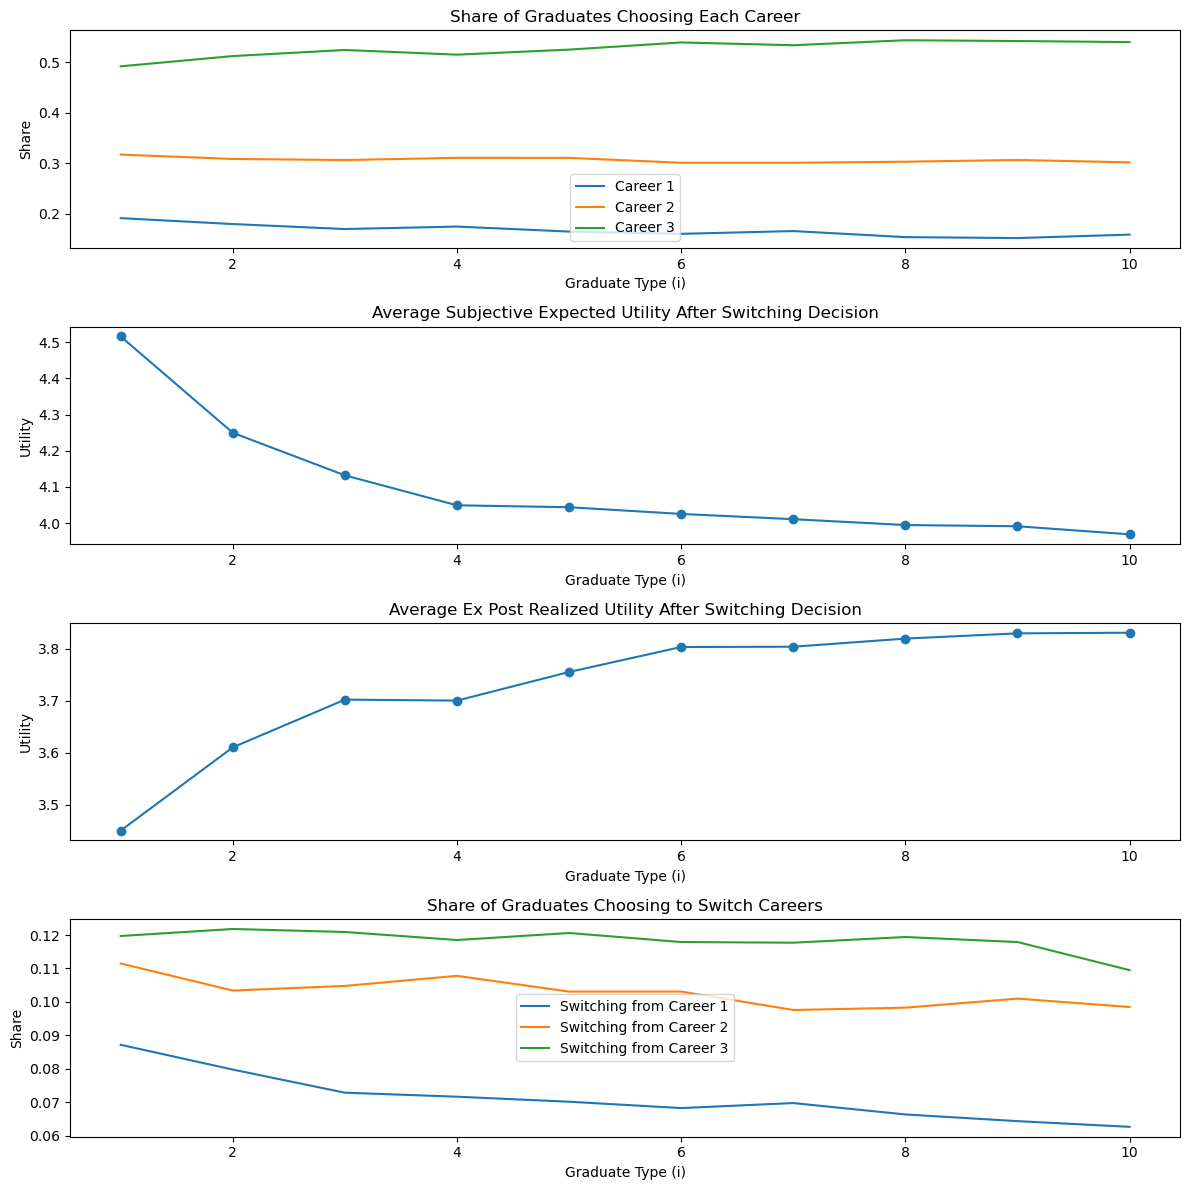

Share of graduates choosing each career for each type of graduate:
[[0.1911 0.317  0.4919]
 [0.1794 0.3084 0.5122]
 [0.1695 0.3062 0.5243]
 [0.1744 0.3106 0.515 ]
 [0.1645 0.3105 0.525 ]
 [0.16   0.3008 0.5392]
 [0.1655 0.3008 0.5337]
 [0.1535 0.3029 0.5436]
 [0.1516 0.3064 0.542 ]
 [0.1585 0.3016 0.5399]]
[3.45060315 3.61046106 3.70208937 3.70023327 3.75516148 3.80315222
 3.80368401 3.81930845 3.82937191 3.83057   ]

Share of graduates choosing to switch careers for each type of graduate:
[[0.0872 0.1115 0.1197]
 [0.0798 0.1034 0.1218]
 [0.0729 0.1048 0.1209]
 [0.0717 0.1078 0.1185]
 [0.0702 0.1031 0.1206]
 [0.0683 0.1031 0.1179]
 [0.0698 0.0976 0.1177]
 [0.0664 0.0983 0.1194]
 [0.0644 0.101  0.1179]
 [0.0627 0.0985 0.1095]]

Average subjective expected utility in the second year for each type of graduate:
[4.17328345 4.22515114 4.32936781 4.30195423 4.35597564 4.3434821
 4.40757644 4.39624021 4.40926469 4.40220751]

Average ex post realized utility in the second year for each type of

In [111]:
# Initialize arrays to store results
share_of_graduates_first_year = np.zeros((par.N, par.J))
share_of_graduates_switching = np.zeros((par.N, par.J))
avg_subjective_expected_utility_first_year = np.zeros(par.N)
avg_realized_utility_first_year = np.zeros(par.N)
avg_subjective_expected_utility_second_year = np.zeros(par.N)
avg_realized_utility_second_year = np.zeros(par.N)

# New scenario with friends' influence
for i in range(1, par.N + 1):
    # Draw F_i = i friends' utilities for each career
    Fi = i
    prior_utilities = np.zeros((par.K, par.J))
    
    for j in range(par.J):
        epsilon_friends = np.random.normal(0, par.sigma, (par.K, Fi))
        prior_utilities[:, j] = par.v[j] + np.mean(epsilon_friends, axis=1)
    
    # Draw own noise terms for first year
    epsilon_own_first_year = np.random.normal(0, par.sigma, (par.K, par.J))
    
    # Calculate prior expected utilities for the first year
    expected_utilities_first_year = prior_utilities + epsilon_own_first_year
    chosen_careers_first_year = np.argmax(expected_utilities_first_year, axis=1)
    
    # Calculate shares of graduates choosing each career in the first year
    for j in range(par.J):
        share_of_graduates_first_year[i-1, j] = np.mean(chosen_careers_first_year == j)
    
    # Calculate the average subjective expected utility in the first year
    avg_subjective_expected_utility_first_year[i-1] = np.mean(expected_utilities_first_year[np.arange(par.K), chosen_careers_first_year])
    
    # Calculate the average realized utility in the first year
    realized_utilities_first_year = par.v[chosen_careers_first_year] + epsilon_own_first_year[np.arange(par.K), chosen_careers_first_year]
    avg_realized_utility_first_year[i-1] = np.mean(realized_utilities_first_year)
    
    # Calculate new priors for the second year with the switching cost
    for k in range(par.K):
        for j in range(par.J):
            if j == chosen_careers_first_year[k]:
                prior_utilities[k, j] = realized_utilities_first_year[k]  # No cost for staying in the same career
            else:
                prior_utilities[k, j] -= par.c  # Include switching cost
    
    # Calculate new expected utilities for the second year
    epsilon_own_second_year = np.random.normal(0, par.sigma, (par.K, par.J))
    expected_utilities_second_year = prior_utilities + epsilon_own_second_year
    chosen_careers_second_year = np.argmax(expected_utilities_second_year, axis=1)
    
    # Calculate shares of graduates choosing to switch careers
    for j in range(par.J):
        switching_graduates = (chosen_careers_first_year == j) & (chosen_careers_second_year != j)
        share_of_graduates_switching[i-1, j] = np.mean(switching_graduates)
    
    # Calculate the average subjective expected utility in the second year
    avg_subjective_expected_utility_second_year[i-1] = np.mean(expected_utilities_second_year[np.arange(par.K), chosen_careers_second_year])
    
    # Calculate the average realized utility in the second year
    realized_utilities_second_year = np.zeros(par.K)
    for k in range(par.K):
        if chosen_careers_second_year[k] == chosen_careers_first_year[k]:
            realized_utilities_second_year[k] = realized_utilities_first_year[k]
        else:
            realized_utilities_second_year[k] = par.v[chosen_careers_second_year[k]] + epsilon_own_second_year[k, chosen_careers_second_year[k]] - par.c
    avg_realized_utility_second_year[i-1] = np.mean(realized_utilities_second_year)

# Plot results
plt.figure(figsize=(12, 12))

# Plot share of graduates choosing each career in the first year
plt.subplot(4, 1, 1)
for j in range(par.J):
    plt.plot(range(1, par.N + 1), share_of_graduates_first_year[:, j], label=f'Career {j+1}')
plt.title('Share of Graduates Choosing Each Career')
plt.xlabel('Graduate Type (i)')
plt.ylabel('Share')
plt.legend()

# Plot average subjective expected utility in the first year
plt.subplot(4, 1, 2)
plt.plot(range(1, par.N + 1), avg_subjective_expected_utility_first_year, marker='o')
plt.title('Average Subjective Expected Utility After Switching Decision')
plt.xlabel('Graduate Type (i)')
plt.ylabel('Utility')

# Plot average ex post realized utility in the first year
plt.subplot(4, 1, 3)
plt.plot(range(1, par.N + 1), avg_realized_utility_first_year, marker='o')
plt.title('Average Ex Post Realized Utility After Switching Decision')
plt.xlabel('Graduate Type (i)')
plt.ylabel('Utility')

# Plot share of graduates choosing to switch careers
plt.subplot(4, 1, 4)
for j in range(par.J):
    plt.plot(range(1, par.N + 1), share_of_graduates_switching[:, j], label=f'Switching from Career {j+1}')
plt.title('Share of Graduates Choosing to Switch Careers')
plt.xlabel('Graduate Type (i)')
plt.ylabel('Share')
plt.legend()

plt.tight_layout()
plt.show()

# Print out the results for clarity
print("Share of graduates choosing each career for each type of graduate:")
print(share_of_graduates_first_year)
print(avg_realized_utility_first_year)
print("\nShare of graduates choosing to switch careers for each type of graduate:")
print(share_of_graduates_switching)
print("\nAverage subjective expected utility in the second year for each type of graduate:")
print(avg_subjective_expected_utility_second_year)
print("\nAverage ex post realized utility in the second year for each type of graduate:")
print(avg_realized_utility_second_year)

## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

In [112]:
from exam_2024 import InterpolationSolver

In [113]:
# Generate random points in the unit square
rng = np.random.default_rng(2024)

X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))


**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

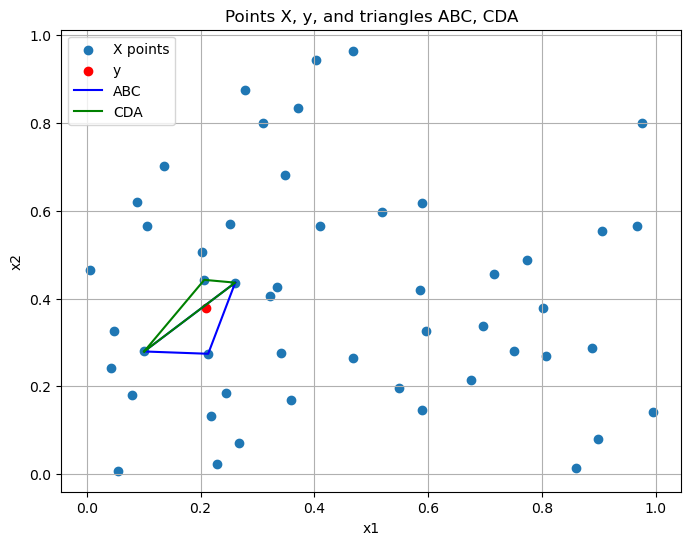

A = [0.26071605 0.43635845]
B = [0.21315735 0.274245  ]
C = [0.10056103 0.27951775]
D = [0.20634391 0.44272557]


In [114]:
# Create an instance of InterpolationSolver
solver = InterpolationSolver(X, y)

# Solve for barycentric coordinates and determine triangle
solver.solve_question1()

#Plot the points and triangles
plt.figure(figsize=(8, 6))
plt.scatter(solver.X[:, 0], solver.X[:, 1], label='X points')
plt.scatter(solver.y[0], solver.y[1], color='red', label='y')

# Plot triangles ABC and CDA
if solver.A is not None and solver.B is not None and solver.C is not None:
    plt.plot([solver.A[0], solver.B[0], solver.C[0], solver.A[0]], [solver.A[1], solver.B[1], solver.C[1], solver.A[1]], 'b-', label='ABC')
    if solver.D is not None:
        plt.plot([solver.C[0], solver.D[0], solver.A[0], solver.C[0]], [solver.C[1], solver.D[1], solver.A[1], solver.C[1]], 'g-', label='CDA')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Points X, y, and triangles ABC, CDA')
plt.legend()
plt.grid(True)
plt.show()

print(f"A = {solver.A}")
print(f"B = {solver.B}")
print(f"C = {solver.C}")
print(f"D = {solver.D}")

**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

In [115]:
# Create an instance of InterpolationSolver
solver = InterpolationSolver(X, y)

# Compute barycentric coordinates and determine the triangle
solver.solve_question2()

# Print barycentric coordinates and triangle location
print(f"Barycentric coordinates for y: ABC {solver.r_ABC}, CDA {solver.r_CDA}")
print(f"Point y is located inside triangle {solver.triangle_name}.")
interpolated_value = solver.interpolate_value()
print(f"The interpolated value of f(y) at y = {solver.y} is: {interpolated_value}")

Barycentric coordinates for y: ABC (0.6286263152916166, 0.06910145494351515, 0.3022722297648682), CDA (0.3682598757102867, -0.13392661883334067, 0.765666743123054)
Point y is located inside triangle ABC.
The interpolated value of f(y) at y = [0.20901926 0.37774759] is: 0.08405201731052576


Now consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [116]:
f = lambda x: x[0]*x[1]
F = np.array([f(x) for x in X])

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

In [117]:
# Create an instance of InterpolationSolver
solver = InterpolationSolver(X, y)

# Solve Question 3: Compute the approximation of f(y) and compare with the true value
solver.solve_question3()

Interpolated value using triangle ABC: 0.08405201731052576
True value of f(y): 0.0789565216259594
Absolute error: 0.005095495684566367


**Question 4:** Repeat question 3 for all points in the set $Y$.

In [118]:
Y = [(0.2,0.2),(0.8,0.2),(0.8,0.8),(0.8,0.2),(0.5,0.5)]

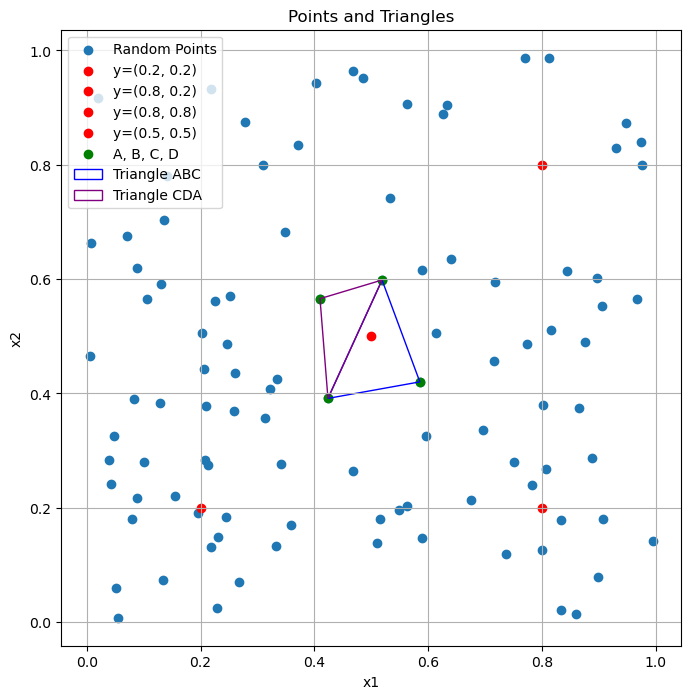

Point y: (0.2, 0.2)
Approximated value of f(y): 0.04010805749040401
True value of f(y): 0.04000000000000001
---
Point y: (0.8, 0.2)
Approximated value of f(y): 0.16113809082073205
True value of f(y): 0.16000000000000003
---
Point y: (0.8, 0.8)
Approximated value of f(y): 0.6453145986852267
True value of f(y): 0.6400000000000001
---
Point y: (0.5, 0.5)
Approximated value of f(y): 0.252396401412959
True value of f(y): 0.25
---


In [119]:
# Create an instance of InterpolationSolver
solver = InterpolationSolver(None, None)

# Solve Question 4
solver.solve_question4()